In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

In [20]:
# Load the data
data = pd.read_csv('machine_inspection.txt', header=None, sep="    ")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


In [22]:
data.columns=["Pressure", "Temperature"]
data.head()


Pressure  Temperature
0       500          537
1       522          507
2       438          567
3       515          500
4       509          475

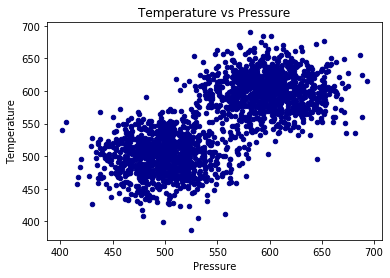

In [33]:
ax = data.plot.scatter(x='Pressure', y='Temperature', c='DarkBlue')
plt.title("Temperature vs Pressure");

In [ ]:
# We can notice 2 centroids at approx (500,500) and (600,600)

### LOF
I decided to try and use LOF with n=50
The local outlier factor (LOF) is based on a concept of a local density, where locality is given by k nearest neighbors, whose distance is used to estimate the density. By comparing the local density of an object to the local densities of its neighbors, one can identify regions of similar density, and points that have a substantially lower density than their neighbors. These are considered to be outliers.

The local density is estimated by the typical distance at which a point can be "reached" from its neighbors. The definition of "reachability distance" used in LOF is an additional measure to produce more stable results within clusters.

The local outlier factor (LOF) of a sample captures its supposed ‘degree of abnormality’. It is the average of the ratio of the local reachability density of a sample and those of its k-nearest neighbors. LOF(k) ~ 1 means Similar density as neighbors, LOF(k) < 1 means Higher density than neighbors (Inlier), LOF(k) > 1 means Lower density than neighbors (Outlier). 

LocalOutlierFactor() gives the negative_outlier_factor, i.e. the opposite LOF of the training samples. The higher, the more normal. Inliers tend to have a LOF score close to 1 (negative_outlier_factor_ close to -1), while outliers tend to have a larger LOF score.





In [125]:
LOF = LocalOutlierFactor(n_neighbors = 50, novelty=True)

In [136]:
labels = LOF.fit(data).predict(data)

/usr/local/lib/python3.6/dist-packages/sklearn/neighbors/lof.py:236: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


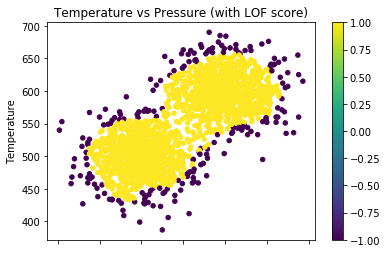

In [127]:
ax = data.plot.scatter(x='Pressure', y='Temperature', c=labels, colormap='viridis')
plt.title("Temperature vs Pressure (with LOF score)");

In [128]:
test_set = pd.DataFrame([[470, 505], [642, 634], [450, 650], [625, 400]])
test_set.columns=["Temperature", "Pressure"]


In [129]:
test_labels = pd.DataFrame(LOF.predict(test_set)).replace(to_replace=[1, -1], value=["Valid", "Irregular"]).values

In [130]:
test_labels.ravel() #Accuracy: 100% 4/4 

array(['Valid', 'Valid', 'Irregular', 'Irregular'], dtype=object)

In [131]:
fig, ax = plt.subplots()
data.plot.scatter(x='Pressure', y='Temperature', c=labels, colormap='viridis', ax=ax, figsize=(15,15))
test_set.plot.scatter(x='Pressure', y='Temperature', color='red', ax=ax)
plt.title("Temperature vs Pressure (with LOF score) \n Test set marked in red");
plt.text(x=500,y=500, s="Slow")
plt.text(x=600,y=600, s="Fast")
plt.show()

## LOF can be used as a model to predict future samples:
By default, LocalOutlierFactor is only meant to be used for outlier detection (novelty=False). Set novelty to True if you want to use LocalOutlierFactor for novelty detection. In this case be aware that that you should only use predict, decision_function and score_samples on new unseen data and not on the training set.


In [137]:
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.LocalOutlierFactor.html